Code: Alexis Aubel (alexis.aubel@gmail.com)

In [68]:
sim_name = [
    'SAM6108_RCE_MC_20240131_256x256_b6_I0p7',                #
    'MeanWind_Exp003_I2p0_30day_Hourly',                      #Hourly, 3D, with MFx
    'SAM6108_RCE_MC_20240131_256x256_b8_I4p0',                #
]

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import Utils as utils

In [70]:
sim_nb = len(sim_name)
dataset_1D, dataset_2D = utils.import_from_name(sim_name)

In [71]:
############################################ COORDINATES ############################################
t = []
x = []
y = []
GRID_SIZE = []
for case in range(sim_nb):
    t.append(dataset_2D[case].coords['time'].values)
    x.append(dataset_2D[case].coords['x'].values)
    y.append(dataset_2D[case].coords['y'].values)
    GRID_SIZE.append(x[case][-1])

In [72]:
############################################# VARIABLES #############################################
PW = []
for case in range(sim_nb):
    PW.append(np.array(dataset_2D[case]['PW']))

In [73]:
#Computing the PW Barycentre
cloud_center = []
for case in range(sim_nb):
    cloud_center.append(np.array(utils.compute_barycenter_list(PW[case], GRID_SIZE[case], tolerance=.7)))

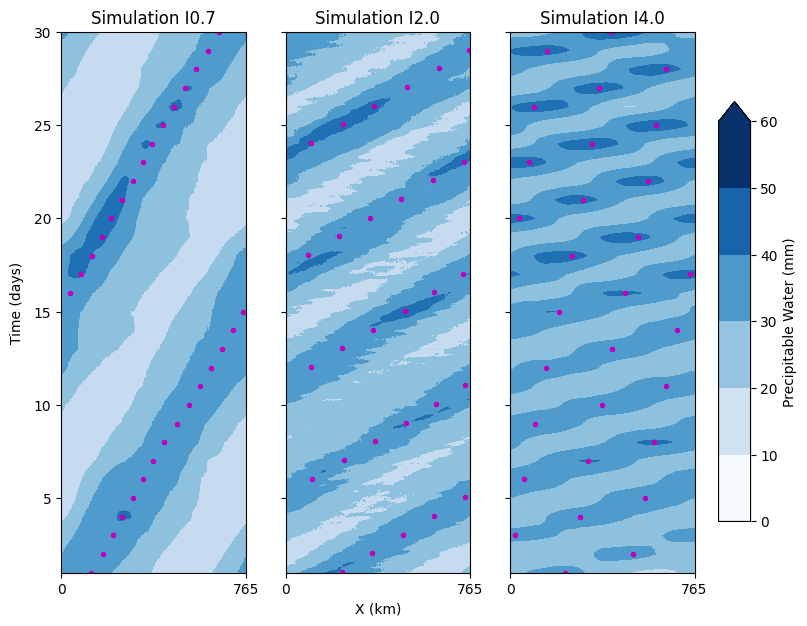

In [74]:
fig, axis = plt.subplots(1, sim_nb, sharey=True)
fig.set_figheight(6)
fig.set_figwidth(8)
fig.tight_layout()

for case in range(sim_nb):
    results = []
    for time in range(len(t[case])):
        try:
            results.append(PW[case][time][int(cloud_center[case][time][1]/GRID_SIZE[case]%1*123)])
        except IndexError:
            results.append(PW[case][time][123])

    ax = axis[case]
    cmap = mpl.cm.Blues
    bounds = [0, 10, 20, 30, 40, 50, 60]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    ax.set_xticks([0,765])
    ax.set_ylim(1,30)
    X = x[case]/1000
    T = t[case]-100
    ax.contourf(X, T, results, cmap=cmap, levels=bounds)
    ax.set_title('Simulation ' + utils.get_sim_desc(sim_name[case]))
    if len(t[case])==30:
        ax.plot(cloud_center[case][:,0]%GRID_SIZE[case]/1000,T[:len(cloud_center[case])], 'om', markersize=3)
    else:
        ax.plot(cloud_center[case][::24,0]%GRID_SIZE[case]/1000,T[:len(cloud_center[case]):24], 'om', markersize=3)

fig.subplots_adjust(right=0.85)
lbl_ax = fig.add_subplot(111, frameon=False)
lbl_ax.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
lbl_ax.set_xlabel('X (km)')
lbl_ax.set_ylabel('Time (days)')
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='vertical', label='Precipitable Water (mm)', extend='max')
plt.show()